In [2]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re


# Load data
dt = pd.read_csv('turbo-vpn-reviews.csv')
dt

,userName,content,score,at
0,Ditxzzx,aplikasi ini bagus untuk mempercepat koneksi i...,4,2024-06-14 15:53:48
1,Gugun Bae,good berkat aplikasi ini lancar anda belum tau...,5,2024-05-27 09:50:03
2,Dalla Cell,"tolong tingkat kn lagi ...,kadang lambat dan l...",4,2024-06-14 00:18:49
3,Muhammad Yusuf,bagus dan top lah aplikasinya.... tapi tolong ...,5,2024-05-15 15:28:21
4,Didi Keling,apk nya parah banget... udah lemot.. download ...,1,2024-06-08 09:45:39
...,...,...,...,...
495,email tika,serius nanya yg pada review oke tuh gmn carany...,2,2022-07-27 13:48:26
496,Hafiz Hidayah,banyak yg mengalami kendala? mungkin disebabka...,5,2020-08-17 19:55:05
497,Koeda 461,"easy to use,ui simpel,kenapa kok opsi protokol...",4,2022-10-02 05:27:43
498,Zwen All,"sering terputus sendiri, banyak iklan (iklan b...",5,2022-04-01 02:15:23


In [72]:
# Selecting data for content and score columns only
# Select data content and score only
text = dt[['content', 'score']]
text.head()

,content,score
0,aplikasi ini bagus untuk mempercepat koneksi i...,4
1,good berkat aplikasi ini lancar anda belum tau...,5
2,"tolong tingkat kn lagi ...,kadang lambat dan l...",4
3,bagus dan top lah aplikasinya.... tapi tolong ...,5
4,apk nya parah banget... udah lemot.. download ...,1


In [73]:
# Preprocesing the text
def preprocress(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

text['content'] = text['content'].apply(lambda x: preprocress(x))
text.head()

C:\Users\septi\AppData\Local\Temp\ipykernel_9668\3396461707.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['content'] = text['content'].apply(lambda x: preprocress(x))


,content,score
0,aplikasi ini bagus untuk mempercepat koneksi i...,4
1,good berkat aplikasi ini lancar anda belum tau...,5
2,tolong tingkat kn lagi kadang lambat dan lelet...,4
3,bagus dan top lah aplikasinya tapi tolong ting...,5
4,apk nya parah banget udah lemot download yg 3 ...,1


In [74]:
# Labeling
def labeling(score):
    if score < 3:
        return 'Negatif'
    elif score == 3:
        return 'Netral'
    elif score > 3:
        return 'Positif'
    
text['label'] = text['score'].apply(lambda x: labeling(x))
text.head()

C:\Users\septi\AppData\Local\Temp\ipykernel_9668\1511119724.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['label'] = text['score'].apply(lambda x: labeling(x))


,content,score,label
0,aplikasi ini bagus untuk mempercepat koneksi i...,4,Positif
1,good berkat aplikasi ini lancar anda belum tau...,5,Positif
2,tolong tingkat kn lagi kadang lambat dan lelet...,4,Positif
3,bagus dan top lah aplikasinya tapi tolong ting...,5,Positif
4,apk nya parah banget udah lemot download yg 3 ...,1,Negatif


In [75]:
# checking missing value
text.isna().sum()

# Dropping missing value
text = text.dropna(axis=0)
text.isna().sum()

content    0
score      0
label      0
dtype: int64

In [76]:
# Removing stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('indonesian')

text['content_sw'] = text['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
text.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\septi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,label,content_sw
0,aplikasi ini bagus untuk mempercepat koneksi i...,4,Positif,aplikasi bagus mempercepat koneksi internet ke...
1,good berkat aplikasi ini lancar anda belum tau...,5,Positif,good berkat aplikasi lancar tau aplikasi berun...
2,tolong tingkat kn lagi kadang lambat dan lelet...,4,Positif,tolong tingkat kn kadang lambat lelet jadih bi...
3,bagus dan top lah aplikasinya tapi tolong ting...,5,Positif,bagus top aplikasinya tolong tingkatkan kecepa...
4,apk nya parah banget udah lemot download yg 3 ...,1,Negatif,apk nya parah banget udah lemot download yg 3 ...


In [77]:
# Tokenize
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize


text['content_token'] = text['content_sw'].apply(lambda x: word_tokenize(x))
text.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\septi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,score,label,content_sw,content_token
0,aplikasi ini bagus untuk mempercepat koneksi i...,4,Positif,aplikasi bagus mempercepat koneksi internet ke...,"[aplikasi, bagus, mempercepat, koneksi, intern..."
1,good berkat aplikasi ini lancar anda belum tau...,5,Positif,good berkat aplikasi lancar tau aplikasi berun...,"[good, berkat, aplikasi, lancar, tau, aplikasi..."
2,tolong tingkat kn lagi kadang lambat dan lelet...,4,Positif,tolong tingkat kn kadang lambat lelet jadih bi...,"[tolong, tingkat, kn, kadang, lambat, lelet, j..."
3,bagus dan top lah aplikasinya tapi tolong ting...,5,Positif,bagus top aplikasinya tolong tingkatkan kecepa...,"[bagus, top, aplikasinya, tolong, tingkatkan, ..."
4,apk nya parah banget udah lemot download yg 3 ...,1,Negatif,apk nya parah banget udah lemot download yg 3 ...,"[apk, nya, parah, banget, udah, lemot, downloa..."


In [78]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()


# Create function for stemming
def stemmed_wrapper(text):
    return stemmer.stem(text)

text_dict = {}
count = 0

for row in text['content_token']:
    for word in row:
        if word not in text_dict:
            text_dict[word] = ' '

print(text_dict)

for key in text_dict:
    text_dict[key] = stemmed_wrapper(key)

print(text_dict)

{'aplikasi': ' ', 'bagus': ' ', 'mempercepat': ' ', 'koneksi': ' ', 'internet': ' ', 'kesalahan': ' ', 'sinyal': ' ', '1': ' ', 'kali': ' ', 'jelek': ' ', 'kasih': ' ', 'bintang': ' ', '4': ' ', 'kekuatan': ' ', 'good': ' ', 'berkat': ' ', 'lancar': ' ', 'tau': ' ', 'beruntung': ' ', 'grtiss': ' ', 'latar': ' ', 'youtube': ' ', 'layar': ' ', 'jernih': ' ', 'kualitas': ' ', '1080': ' ', 'premium': ' ', 'puas': ' ', 'aktif': ' ', 'turbo': ' ', 'a': ' ', 'pencet': ' ', 'tombol': ' ', 'wortel': ' ', 'pertahankan': ' ', 'mengerti': ' ', 'uang': ' ', 'memboroskan': ' ', 'usaha': ' ', 'semoga': ' ', 'sukses': ' ', 'tolong': ' ', 'tingkat': ' ', 'kn': ' ', 'kadang': ' ', 'lambat': ' ', 'lelet': ' ', 'jadih': ' ', 'ya': ' ', 'kedepanya': ' ', 'kinerja': ' ', 'nya': ' ', 'tapu': ' ', 'sa': ' ', 'aini': ' ', 'lumayan': ' ', 'top': ' ', 'aplikasinya': ' ', 'tingkatkan': ' ', 'kecepatannya': ' ', 'lemot': ' ', 'suka': ' ', 'gagal': ' ', 'ulang': ' ', 'kuota': ' ', 'signal': ' ', 'terima': ' ', 'apk

In [79]:
# Adding stemmed text into the dataframe
def get_stemmed_text(text):
    return [text_dict[word] for word in text]

content_stem = []
for row in text['content_token']:
    stemmed = get_stemmed_text(row)
    text_stem = ' '.join(stemmed)
    content_stem.append(text_stem)

text['content_stem'] = content_stem
text.head()

,content,score,label,content_sw,content_token,content_stem
0,aplikasi ini bagus untuk mempercepat koneksi i...,4,Positif,aplikasi bagus mempercepat koneksi internet ke...,"[aplikasi, bagus, mempercepat, koneksi, intern...",aplikasi bagus cepat koneksi internet salah si...
1,good berkat aplikasi ini lancar anda belum tau...,5,Positif,good berkat aplikasi lancar tau aplikasi berun...,"[good, berkat, aplikasi, lancar, tau, aplikasi...",good berkat aplikasi lancar tau aplikasi untun...
2,tolong tingkat kn lagi kadang lambat dan lelet...,4,Positif,tolong tingkat kn kadang lambat lelet jadih bi...,"[tolong, tingkat, kn, kadang, lambat, lelet, j...",tolong tingkat kn kadang lambat lelet jadih bi...
3,bagus dan top lah aplikasinya tapi tolong ting...,5,Positif,bagus top aplikasinya tolong tingkatkan kecepa...,"[bagus, top, aplikasinya, tolong, tingkatkan, ...",bagus top aplikasi tolong tingkat cepat kadang...
4,apk nya parah banget udah lemot download yg 3 ...,1,Negatif,apk nya parah banget udah lemot download yg 3 ...,"[apk, nya, parah, banget, udah, lemot, downloa...",apk nya parah banget udah lot download yg 3 ja...


In [80]:
# Save stemmed text to csv
data = text.loc[:,['content_stem','score', 'label']]
data.to_csv('text_hasil_stemming.csv', index=False)

In [3]:
# Load the data again
text = pd.read_csv('text_hasil_stemming.csv')
text.head()

,content_stem,score,label
0,aplikasi bagus cepat koneksi internet salah si...,4,Positif
1,good berkat aplikasi lancar tau aplikasi untun...,5,Positif
2,tolong tingkat kn kadang lambat lelet jadih bi...,4,Positif
3,bagus top aplikasi tolong tingkat cepat kadang...,5,Positif
4,apk nya parah banget udah lot download yg 3 ja...,1,Negatif


In [4]:
# Import sklearn for doing naive bayes analysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Preparing NB
nb = GaussianNB()

# Preparing tfidf vector
tfidf = TfidfVectorizer()
tfidf_x = tfidf.fit_transform(text['content_stem'])

In [6]:
X = tfidf_x.toarray()
y = text['label']

In [7]:
# Split the dataset
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.33,
                                                    stratify=y, random_state=42)

In [8]:
# Performing NB
nb.fit(X_train, y_train)

GaussianNB()

In [9]:
# Making pediction
y_pred = nb.predict(X_test)

comp = pd.DataFrame({'initial_data':y_test, 'predicted':y_pred})
comp.head()

,initial_data,predicted
82,Positif,Positif
355,Positif,Negatif
327,Positif,Positif
209,Positif,Positif
353,Positif,Positif


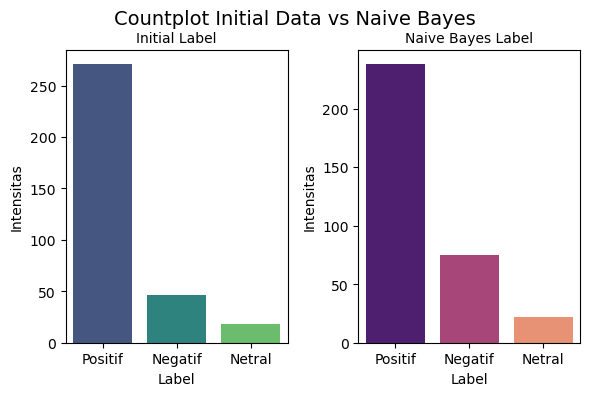

In [10]:
# Visualizing data
fig, ax = plt.subplots(1,2, figsize=(6,4))

sns.countplot(data=comp, x='initial_data', ax=ax[0], palette='viridis')
sns.countplot(data=comp, x='predicted', ax=ax[1], palette='magma')
fig.suptitle('Countplot Initial Data vs Naive Bayes', fontsize=14)
fig.tight_layout()
ax[0].set_title('Initial Label', fontsize=10)
ax[0].set_xlabel('Label', fontsize=10)
ax[0].set_ylabel('Intensitas', fontsize=10)
ax[1].set_title('Naive Bayes Label', fontsize=10)
ax[1].set_xlabel('Label', fontsize=10)
ax[1].set_ylabel('Intensitas', fontsize=10)
plt.show()


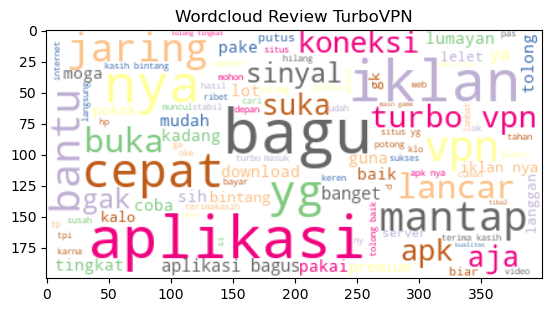

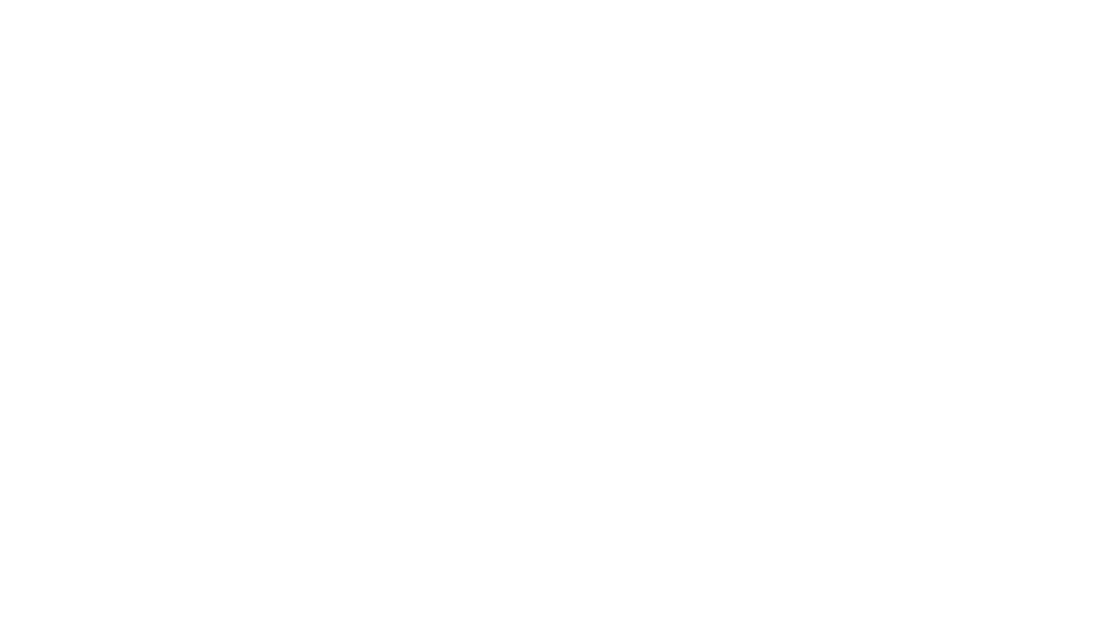

In [11]:
# Visualizing the text
from wordcloud import WordCloud, STOPWORDS

content = ' '.join(review for review in text['content_stem'])

wordcloud = WordCloud(max_font_size=50,
                     max_words=100,
                     background_color='white',
                     colormap='Accent', 
                     stopwords=STOPWORDS).generate(content)
plt.title('Wordcloud Review TurboVPN')
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(figsize=(14,8))
plt.axis('off')
plt.show()

In [12]:
# Measure the accuracy
print('Akurasi dari model adalah: ', accuracy_score(y_test, y_pred))
print('Perbandingan confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Laporan Classifikasi \n', classification_report(y_test, y_pred))

Akurasi dari model adalah:  0.6776119402985075
Perbandingan confusion matrix: 
 [[ 23   3  20]
 [  4   0  14]
 [ 48  19 204]]
Laporan Classifikasi 
               precision    recall  f1-score   support

     Negatif       0.31      0.50      0.38        46
      Netral       0.00      0.00      0.00        18
     Positif       0.86      0.75      0.80       271

    accuracy                           0.68       335
   macro avg       0.39      0.42      0.39       335
weighted avg       0.74      0.68      0.70       335



In [13]:
tfidf_vector = pd.DataFrame(X)
tfidf_vector['label'] = y
tfidf_vector.to_csv('tfidf_vector_turbo_vpn_review.csv', index=False)